# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [27]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [28]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [29]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [30]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return -(x**2)*numpy.cos(x)+2*x*numpy.sin(x)+2*numpy.cos(x)-2


Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [31]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [32]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)


Check your analytic function:

In [33]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [34]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
def integrate_numeric(xmin, xmax, N):
    dx=(xmax-xmin)/(2*N)
    x=xmin+dx
    even=0.0
    for i in range(1,N+1):
        even += 4*f(x)
        x += 2*dx
    x = xmin+(dx*2)
    odd=0.0
    for i in range(1,N):
        odd += 2*f(x)
        x += 2*dx
    return (dx/3)*(f(xmin)+f(xmax)+odd+even)
    



Make sure you have implemented Simpson's rule correctly:

In [35]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [36]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Graph')

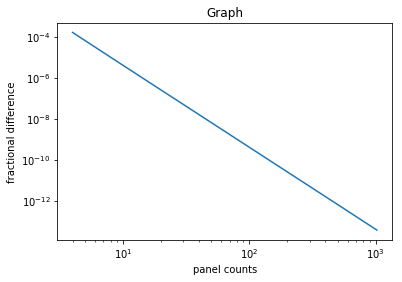

In [37]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
M = numpy.array(panel_counts)
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solutionresult_analytic

y_values = [(-integrate_numeric(x0, x1,4)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,8)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,16)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,32)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,64)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,128)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,256)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,512)+result_analytic)/result_analytic,(-integrate_numeric(x0, x1,1024)+result_analytic)/result_analytic]
plt.plot(panel_counts, y_values)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('fractional difference')
plt.xlabel('panel counts')
plt.title('Graph')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases, the accuracy of the numerical method increases and the error decreases by a factor of N^-4, but if N gets too large the computer cannot store the values to a high enough precision so some of the digits are lost, therefore reducing the accuracy of the calculation.


If the trapezium rule was being used, how would the panel
count affect accuracy? 

As the number of panels increases the accuracy increases and the error decreases by a factor of N^-2, but as N becomes too large rounding error are introduced by the computer as it cannot store numbers to infinite precision so some accuracy is lost. 